In [2]:
import numpy as np
import scipy.integrate as sc_i
import matplotlib.pyplot as plt

In [3]:
# Create time array.
t_lim = (0.,5.) # seconds
t = np.linspace(*t_lim,50)

In [5]:
N_0 = [0.001, 0, 0, 0, 0] # initial values
R = [1.0, 3.0, 0.5, 10., 0.] # decay rates

# Derivative formula.
def dN_dt(N,t):
    dN_dt = [-N[0]*R[0]]
    for i in range(1,len(N)):
        dN_dt.append(-N[i]*R[i]+N[i-1]*R[i-1])
    return dN_dt

N_array = sc_i.odeint(dN_dt,N_0,t)

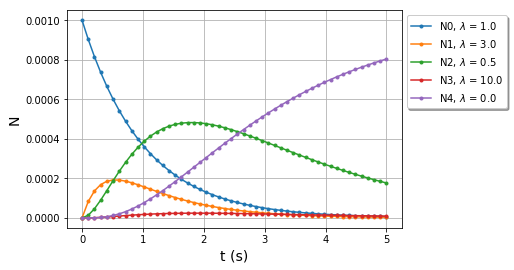

In [25]:
for i in range(5):
     plt.plot(t,N_array[:,i],'.-',label=f'N{i}, $\lambda$ = {R[i]}')
        
plt.ylabel('N',
          fontsize = '14')
plt.xlabel('t (s)',
          fontsize = '14')

plt.legend(bbox_to_anchor=(1,1),
           shadow=True)
plt.grid()

plt.show()

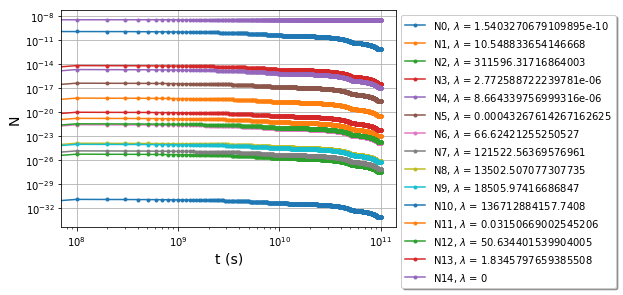

In [31]:
# Uranium Series.

# Initial abundances.
N0 = [1.09e-10, # U-238
        0, # Th-234
        0, # Pa-234
        0, # U-234
        0, # Th-230
        0, # Ra-266
        0, # Rn-222
        0, # Po-218
        0, # Pb-214
        0, # Bi-214
        0, # Po-214
        0, # Pb-210
        0, # Bi-210
        0, # Po-210
        3.090e-09] # Pb-206

def days_to_years(time):
    return time/365.25

def mins_to_years(time):
    return time/60/24/365.25

# Half Lives (years).
T_half = [4.5e9, # U-238
          days_to_years(24), # Th-234
          mins_to_years(1.17), # Pa-234
          250000, # U-234
          80000, # Th-230
          1602, # Ra-266
          days_to_years(3.8), # Rn-222
          mins_to_years(3), # Po-218
          mins_to_years(27), # Pb-214
          mins_to_years(19.7), # Bi-214
          mins_to_years(160e-6/60), # Po-214
          22, # Pb-210
          days_to_years(5), # Bi-210
          days_to_years(138)] # Po-210

# Decay Rates.
R = [np.log(2)/halflife for halflife in T_half]
R.append(0) # Pb-206 stable

# Timescale.
T = np.linspace(0,10**11,1000)

N_array2 = sc_i.odeint(dN_dt,N0,T)

for i in range(len(N0)):
     plt.loglog(T,N_array2[:,i],'.-',label=f'N{i}, $\lambda$ = {R[i]}')
        
plt.ylabel('N',
          fontsize = '14')
plt.xlabel('t (s)',
          fontsize = '14')

plt.legend(bbox_to_anchor=(1,1),
           shadow=True)
plt.grid()

plt.show()